In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('../data/data_normalized.csv')

# Silhouette score to find the optimal number of clusters

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

k_range = range(2, 30, 2)

scores = []

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df)
    sil_score = silhouette_score(df, labels, metric='euclidean')
    db_score = davies_bouldin_score(df, labels)
    scores.append((k, sil_score, db_score))

  0%|          | 0/14 [00:00<?, ?it/s]

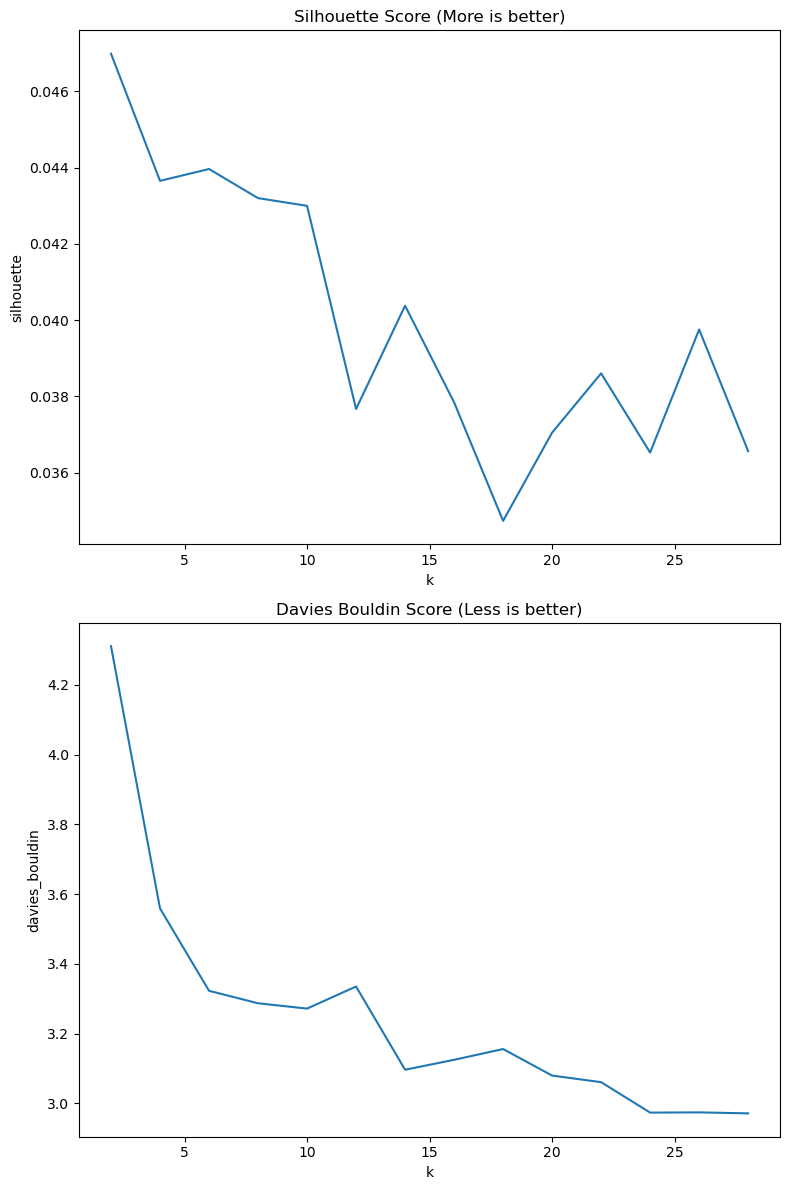

In [58]:
score_df = pd.DataFrame(scores, columns=['k', 'silhouette', 'davies_bouldin'])

fig, axes = plt.subplots(2, 1, figsize=(8, 12))

sns.lineplot(data=score_df, x='k', ax=axes[0], y='silhouette')
sns.lineplot(data=score_df, x='k', ax=axes[1], y='davies_bouldin')

axes[0].set_title('Silhouette Score (More is better)')
axes[1].set_title('Davies Bouldin Score (Less is better)')

plt.tight_layout()
plt.show()

It seems that KMeans might not be the best choice lets try DBSCAN

In [56]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameters to test
eps_range = np.arange(0.1, 1, 0.1)
min_samples_range = range(2, 10, 1)

param_combinations = [(e, m) for e in eps_range for m in min_samples_range]

db_scores = []
# Iterate over the range of parameters
for eps, min_samples in tqdm(param_combinations):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df)
    if len(np.unique(labels)) <= 1:
        print("Only one cluster found, skipping")
        continue
    sil_score = silhouette_score(df, labels, metric='euclidean')
    db_score = davies_bouldin_score(df, labels)
    db_scores.append((eps, min_samples, sil_score, db_score))

  0%|          | 0/72 [00:00<?, ?it/s]

Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one cluster found, skipping
Only one c

In [57]:
dbscan_score_df = pd.DataFrame(db_scores, columns=['eps', 'min_samples', 'silhouette', 'davies_bouldin'])
dbscan_score_df

,eps,min_samples,silhouette,davies_bouldin
